In [1]:
# !pip install tensorflow

In [2]:
import pandas as pd

df_row = pd.read_csv("C:/Users/Administrateur/Documents/final_merged_data.csv",low_memory=False)


In [3]:
df_row.head()

,id,start,end,CO,NO2,O3,PM10,PM2.5,SO2,Climate_Name,...,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S
0,FR03088,2018-09-11T00:00:00+0000,2018-09-11T01:00:00+00:00,NaN,NaN,73.3,NaN,NaN,NaN,CARPENTRAS,...,NaN,NaN,NaN,NaN,6.1,1.0,NaN,NaN,1547.0,9.0
1,FR03088,2018-09-11T00:00:00+0000,2018-09-11T01:00:00+00:00,NaN,NaN,73.3,NaN,NaN,NaN,PERNES LES FONTAINES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FR03088,2018-09-11T01:00:00+0000,2018-09-11T02:00:00+00:00,NaN,NaN,73.7,NaN,NaN,NaN,CARPENTRAS,...,NaN,NaN,NaN,NaN,6.1,1.0,NaN,NaN,1547.0,9.0
3,FR03088,2018-09-11T01:00:00+0000,2018-09-11T02:00:00+00:00,NaN,NaN,73.7,NaN,NaN,NaN,PERNES LES FONTAINES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FR03088,2018-09-11T02:00:00+0000,2018-09-11T03:00:00+00:00,NaN,NaN,64.8,NaN,NaN,NaN,CARPENTRAS,...,NaN,NaN,NaN,NaN,6.1,1.0,NaN,NaN,1547.0,9.0


In [4]:
data = df_row.dropna(axis=1, how='all')
data = data.drop( [ "Climate_Name" , "Climate_Latitude","Climate_Longitude", "Pollutant_Station_Code","NUM_POSTE", "end", "id","NOM_USUEL"],axis=1 )
data

,start,NO2,O3,PM10,PM2.5,SO2,Pollutant_Station_Latitude,Pollutant_Station_Longitude,Distance_km,date,...,QFXI2,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,QDXI3S,HXI3S,QHXI3S
0,2018-09-11T00:00:00+0000,NaN,73.3,NaN,NaN,NaN,44.06035,5.067413,2.692297,20180911,...,NaN,NaN,NaN,NaN,NaN,6.1,1.0,NaN,1547.0,9.0
1,2018-09-11T00:00:00+0000,NaN,73.3,NaN,NaN,NaN,44.06035,5.067413,9.250319,20180911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-11T01:00:00+0000,NaN,73.7,NaN,NaN,NaN,44.06035,5.067413,2.692297,20180911,...,NaN,NaN,NaN,NaN,NaN,6.1,1.0,NaN,1547.0,9.0
3,2018-09-11T01:00:00+0000,NaN,73.7,NaN,NaN,NaN,44.06035,5.067413,9.250319,20180911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-11T02:00:00+0000,NaN,64.8,NaN,NaN,NaN,44.06035,5.067413,2.692297,20180911,...,NaN,NaN,NaN,NaN,NaN,6.1,1.0,NaN,1547.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923520,2024-06-03T04:00:00+0000,NaN,48.2,15.7,11.4,NaN,45.04250,5.044300,1.317956,20240603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2923521,2024-06-03T05:00:00+0000,NaN,47.2,17.2,13.0,NaN,45.04250,5.044300,3.685041,20240603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2923522,2024-06-03T05:00:00+0000,NaN,47.2,17.2,13.0,NaN,45.04250,5.044300,1.317956,20240603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2923523,2024-06-03T06:00:00+0000,NaN,49.4,21.1,15.1,NaN,45.04250,5.044300,3.685041,20240603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import datetime

data['start'] = pd.to_datetime(data['start'])

# Feature Engineering
data['hour'] = data['start'].dt.hour
data['day'] = data['start'].dt.day
data['month'] = data['start'].dt.month
data['year'] = data['start'].dt.year

data = data.drop("start", axis=1)

In [6]:
data.to_csv("data_to_ML.csv") 
data

,NO2,O3,PM10,PM2.5,SO2,Pollutant_Station_Latitude,Pollutant_Station_Longitude,Distance_km,date,ALTI,...,QHXI2,FXI3S,QFXI3S,QDXI3S,HXI3S,QHXI3S,hour,day,month,year
0,NaN,73.3,NaN,NaN,NaN,44.06035,5.067413,2.692297,20180911,98.0,...,NaN,6.1,1.0,NaN,1547.0,9.0,0,11,9,2018
1,NaN,73.3,NaN,NaN,NaN,44.06035,5.067413,9.250319,20180911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,11,9,2018
2,NaN,73.7,NaN,NaN,NaN,44.06035,5.067413,2.692297,20180911,98.0,...,NaN,6.1,1.0,NaN,1547.0,9.0,1,11,9,2018
3,NaN,73.7,NaN,NaN,NaN,44.06035,5.067413,9.250319,20180911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,11,9,2018
4,NaN,64.8,NaN,NaN,NaN,44.06035,5.067413,2.692297,20180911,98.0,...,NaN,6.1,1.0,NaN,1547.0,9.0,2,11,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923520,NaN,48.2,15.7,11.4,NaN,45.04250,5.044300,1.317956,20240603,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,3,6,2024
2923521,NaN,47.2,17.2,13.0,NaN,45.04250,5.044300,3.685041,20240603,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5,3,6,2024
2923522,NaN,47.2,17.2,13.0,NaN,45.04250,5.044300,1.317956,20240603,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,3,6,2024
2923523,NaN,49.4,21.1,15.1,NaN,45.04250,5.044300,3.685041,20240603,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6,3,6,2024


In [7]:
# calculate the mean of each column
# Select only numeric columns for filling NaN values
numeric_cols = data.select_dtypes(include=['number']).columns

# Fill NaN values with the mean of each numeric column
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [8]:
data

,NO2,O3,PM10,PM2.5,SO2,Pollutant_Station_Latitude,Pollutant_Station_Longitude,Distance_km,date,ALTI,...,QHXI2,FXI3S,QFXI3S,QDXI3S,HXI3S,QHXI3S,hour,day,month,year
0,13.881767,73.3,15.252363,9.91531,3.904086,44.06035,5.067413,2.692297,20180911,98.000000,...,9.0,6.100000,1.000000,4.833333,1547.000000,9.000000,0,11,9,2018
1,13.881767,73.3,15.252363,9.91531,3.904086,44.06035,5.067413,9.250319,20180911,589.733283,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,0,11,9,2018
2,13.881767,73.7,15.252363,9.91531,3.904086,44.06035,5.067413,2.692297,20180911,98.000000,...,9.0,6.100000,1.000000,4.833333,1547.000000,9.000000,1,11,9,2018
3,13.881767,73.7,15.252363,9.91531,3.904086,44.06035,5.067413,9.250319,20180911,589.733283,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,1,11,9,2018
4,13.881767,64.8,15.252363,9.91531,3.904086,44.06035,5.067413,2.692297,20180911,98.000000,...,9.0,6.100000,1.000000,4.833333,1547.000000,9.000000,2,11,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923520,13.881767,48.2,15.700000,11.40000,3.904086,45.04250,5.044300,1.317956,20240603,589.733283,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,4,3,6,2024
2923521,13.881767,47.2,17.200000,13.00000,3.904086,45.04250,5.044300,3.685041,20240603,156.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,5,3,6,2024
2923522,13.881767,47.2,17.200000,13.00000,3.904086,45.04250,5.044300,1.317956,20240603,589.733283,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,5,3,6,2024
2923523,13.881767,49.4,21.100000,15.10000,3.904086,45.04250,5.044300,3.685041,20240603,156.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,6,3,6,2024


In [9]:
# Aggregate data by station and day

group = [ "Pollutant_Station_Latitude", "Pollutant_Station_Longitude","date"]

aggregated_data = data.groupby(group).mean().reset_index()

In [10]:
aggregated_data

,Pollutant_Station_Latitude,Pollutant_Station_Longitude,date,NO2,O3,PM10,PM2.5,SO2,Distance_km,ALTI,...,QHXI2,FXI3S,QFXI3S,QDXI3S,HXI3S,QHXI3S,hour,day,month,year
0,44.054474,4.697408,20180917,13.881767,50.785980,11.975000,9.441667,3.904086,8.978006,30.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,11.5,17.0,9.0,2018.0
1,44.054474,4.697408,20180918,13.881767,50.785980,15.048611,13.354167,3.904086,8.978006,30.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,11.5,18.0,9.0,2018.0
2,44.054474,4.697408,20180919,13.881767,50.785980,13.790278,3.568924,3.904086,8.978006,30.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,11.5,19.0,9.0,2018.0
3,44.054474,4.697408,20180920,13.881767,50.785980,14.805556,9.844444,3.904086,8.978006,30.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,4.0,20.0,9.0,2018.0
4,44.054474,4.697408,20180921,13.881767,50.785980,13.900689,8.687225,3.904086,8.978006,30.000000,...,9.0,9.452657,5.575238,4.833333,1282.530448,8.971277,11.5,21.0,9.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,46.316174,4.839994,20240530,3.712500,62.187500,15.252363,0.908971,3.904086,6.501974,404.366641,...,9.0,13.326329,3.287619,4.833333,1504.765224,8.985639,11.5,30.0,5.0,2024.0
44192,46.316174,4.839994,20240531,4.220833,70.137500,15.252363,0.733333,3.904086,6.501974,404.366641,...,9.0,9.776329,3.287619,4.833333,1213.765224,8.985639,11.5,31.0,5.0,2024.0
44193,46.316174,4.839994,20240601,2.454167,69.054167,15.252363,2.391667,3.904086,6.501974,404.366641,...,9.0,9.476329,3.287619,4.833333,1456.765224,8.985639,11.5,1.0,6.0,2024.0
44194,46.316174,4.839994,20240602,2.058333,51.054167,15.252363,1.866667,3.904086,6.501974,404.366641,...,9.0,8.826329,3.287619,4.833333,1704.765224,8.985639,11.5,2.0,6.0,2024.0


In [11]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
scaler = StandardScaler()
# Drop the grouping columns to scale only the numeric columns
scaled_features = scaler.fit_transform(aggregated_data.drop(columns=group))
# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=aggregated_data.drop(columns=group).columns)

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# List of pollutants to include
pollutants = [ "NO2", "O3", "PM10", "PM2.5", "SO2"]

# Prepare sequences
def create_sequences(data, num_days=15, prediction_days=7):
    sequences = []
    targets = []
    for i in range(len(data) - num_days - prediction_days):
        seq = data.iloc[i:i + num_days][pollutants].values
        target = data.iloc[i + num_days:i + num_days + prediction_days][pollutants].values
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Group by station and create sequences
sequences = []
targets = []
for station, group in aggregated_data.groupby(["Pollutant_Station_Latitude", "Pollutant_Station_Longitude"]):
    seq, targ = create_sequences(group)
    sequences.extend(seq)
    targets.extend(targ)

sequences = np.array(sequences)
targets = np.array(targets)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (34494, 15, 5), y_train shape: (34494, 7, 5)
X_test shape: (8624, 15, 5), y_test shape: (8624, 7, 5)


In [24]:
sequences

array([[[13.88176729, 50.78597988, 11.975     ,  9.44166667,
          3.90408579],
        [13.88176729, 50.78597988, 15.04861111, 13.35416667,
          3.90408579],
        [13.88176729, 50.78597988, 13.79027778,  3.56892361,
          3.90408579],
        ...,
        [13.88176729, 50.78597988, 17.57083333,  7.16666667,
          3.90408579],
        [13.88176729, 50.78597988, 23.35634847, 15.9125    ,
          3.90408579],
        [13.88176729, 50.78597988, 26.3875    , 14.775     ,
          3.90408579]],

       [[13.88176729, 50.78597988, 15.04861111, 13.35416667,
          3.90408579],
        [13.88176729, 50.78597988, 13.79027778,  3.56892361,
          3.90408579],
        [13.88176729, 50.78597988, 14.80555556,  9.84444444,
          3.90408579],
        ...,
        [13.88176729, 50.78597988, 23.35634847, 15.9125    ,
          3.90408579],
        [13.88176729, 50.78597988, 26.3875    , 14.775     ,
          3.90408579],
        [13.88176729, 50.78597988, 19.76666667, 

In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def show_mse_graph(y_pred, y_test, pollutants):
    # Define a custom color palette for synthwave style
    colors = ['#FF6EC7', '#7A5AEC', '#FFD166', '#FF8C42', '#8AFFA5', '#4F5D75']
    
    # Calculate errors (absolute differences)
    errors = np.abs(y_pred - y_test)
    
    # Calculate MSE for each pollutant
    mse = np.zeros(len(pollutants))
    for i in range(len(pollutants)):
        mse[i] = mean_squared_error(y_test[:, :, i], y_pred[:, :, i])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(pollutants, mse, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5, capsize=7)
    plt.title('Mean Square Error (MSE) for Each Pollutant', fontsize=16, fontweight='bold')
    plt.xlabel('Pollutant', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adding mean values on top of each bar
    for bar, m in zip(bars, mse):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.15, f'{m:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
    plt.tight_layout()
    plt.show()

In [14]:
# Plot training history
def plot_training_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM


modelCNN = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(15, sequences.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128*2, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(targets.shape[1] * targets.shape[2], activation='linear'),
    tf.keras.layers.Reshape((7, targets.shape[2]))
])

# Compile the model
modelCNN.compile(optimizer='adam', loss='mse')

C:\Users\Administrateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train the model
historyCNN = modelCNN.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 114.1115 - val_loss: 70.4520
Epoch 2/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 70.8952 - val_loss: 65.7620
Epoch 3/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 67.0408 - val_loss: 62.1956
Epoch 4/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 65.5782 - val_loss: 61.2496
Epoch 5/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 63.9759 - val_loss: 60.7188
Epoch 6/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 63.1513 - val_loss: 61.1119
Epoch 7/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 60.8886 - val_loss: 59.7001
Epoch 8/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 60.6996 - val_loss: 59.9805
Epoch 9/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 59.2123 - val_loss: 57.6562
Epoch 10/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 58.6439 - val_loss: 56.9636
Epoch 11/60
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 57.5556 - val_loss: 55.8485
Epoch 12/60
863/863 ━━━━━━━━━

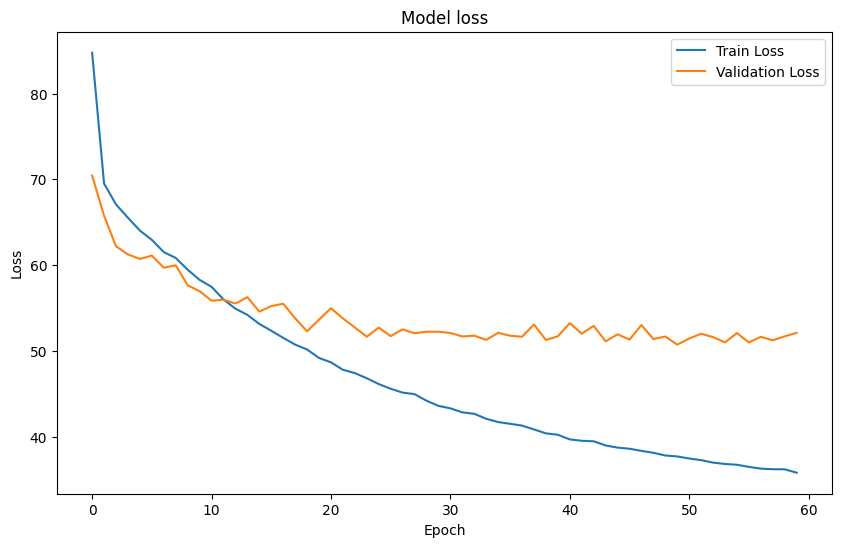

In [17]:
# Call the function to plot training history
plot_training_history(historyCNN)

In [18]:
y_predCNN = modelCNN.predict(X_test)

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


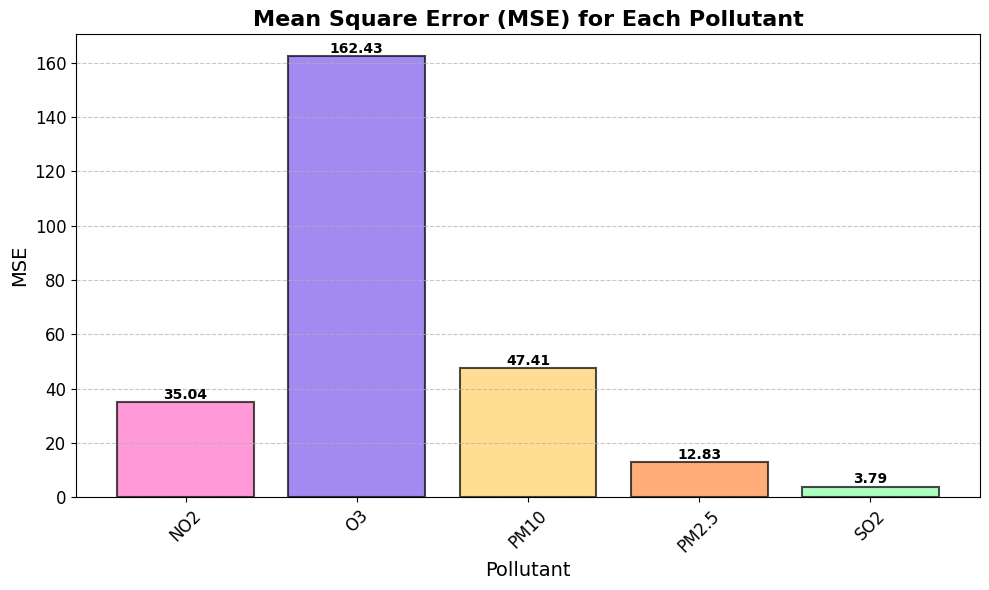

In [19]:
show_mse_graph( y_test, y_predCNN, pollutants)

In [20]:
modelRNN = Sequential([
    LSTM(64, activation='relu', input_shape=(15, sequences.shape[2]), return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    Flatten(),
    Dense(128*2, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(targets.shape[1] * targets.shape[2], activation='linear'),
    tf.keras.layers.Reshape((7, targets.shape[2]))
])


modelRNN.summary()
modelRNN.compile(optimizer='adam', loss='mse')


# Train the model
historyRNN = modelRNN.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 15, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         491,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 35)                  │           4,515 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 5)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 645,923 (2.46 MB)

 Trainable params: 645,923 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 109.4269 - val_loss: 65.4592
Epoch 2/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 66.7688 - val_loss: 62.0049
Epoch 3/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 65.3029 - val_loss: 60.1713
Epoch 4/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 63.2482 - val_loss: 58.6852
Epoch 5/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 61.2634 - val_loss: 57.5699
Epoch 6/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 58.7468 - val_loss: 56.3021
Epoch 7/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 56.9009 - val_loss: 54.9530
Epoch 8/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 55.1962 - val_loss: 51.4422
Epoch 9/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 52.2990 - val_loss: 51.3860
Epoch 10/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 50.4860 - val_loss: 49.5286
Epoch 11/70
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 47.8561 - val_loss: 48.4163
Epoch 12/70
863/

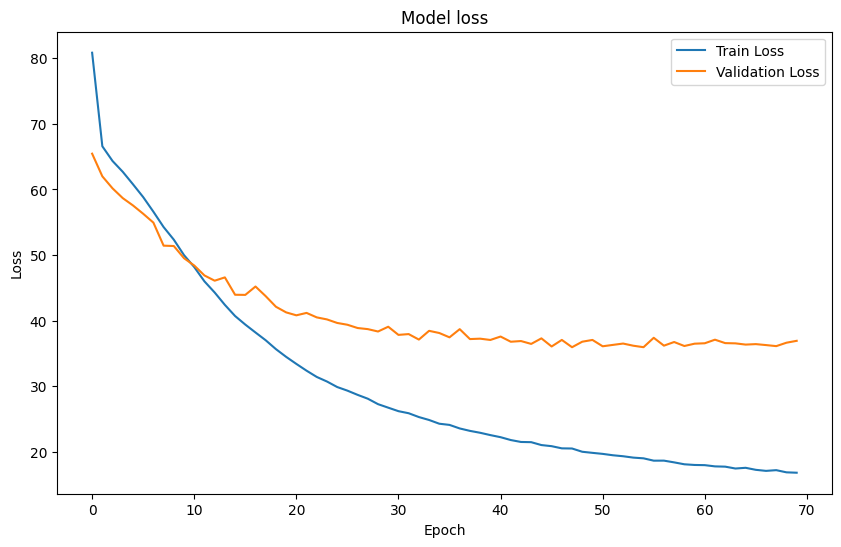

In [21]:
# Call the function to plot training history
plot_training_history(historyRNN)

270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


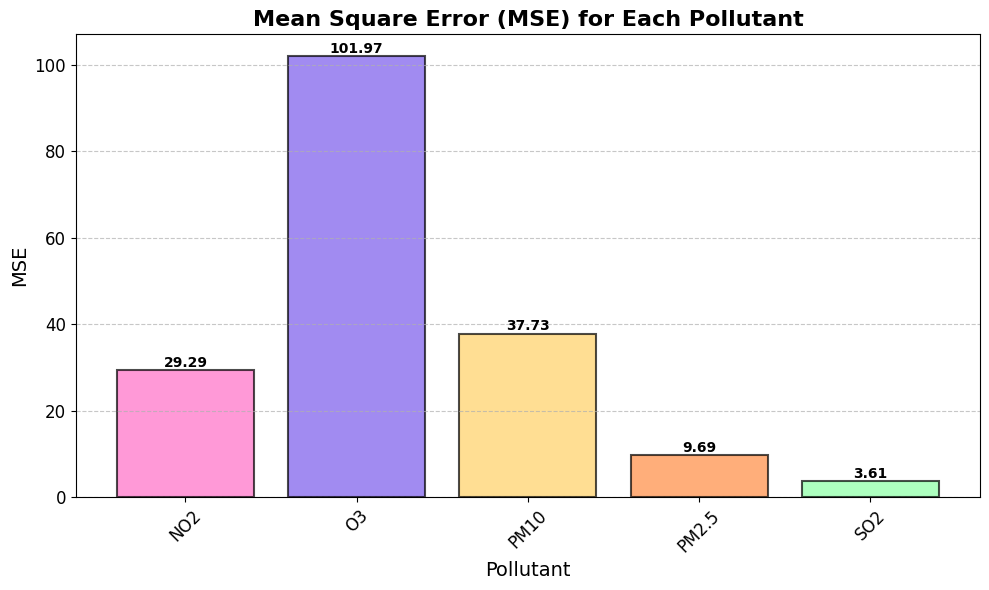

In [22]:
y_predRNN = modelRNN.predict(X_test)

show_mse_graph( y_test, y_predRNN, pollutants)